<a href="https://colab.research.google.com/github/SaptarshiSen-1/Discission-tree-using-data-set/blob/main/Discission_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


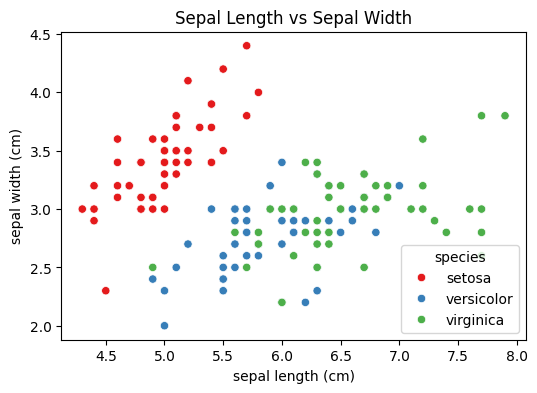

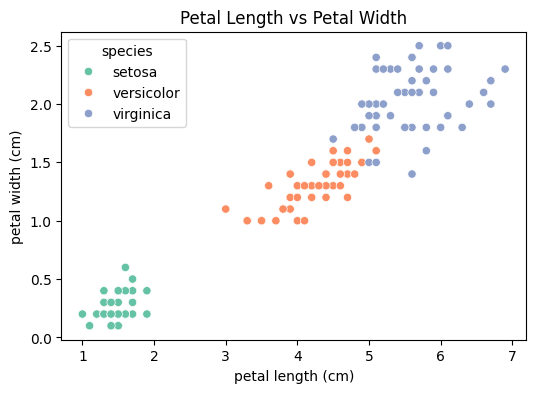

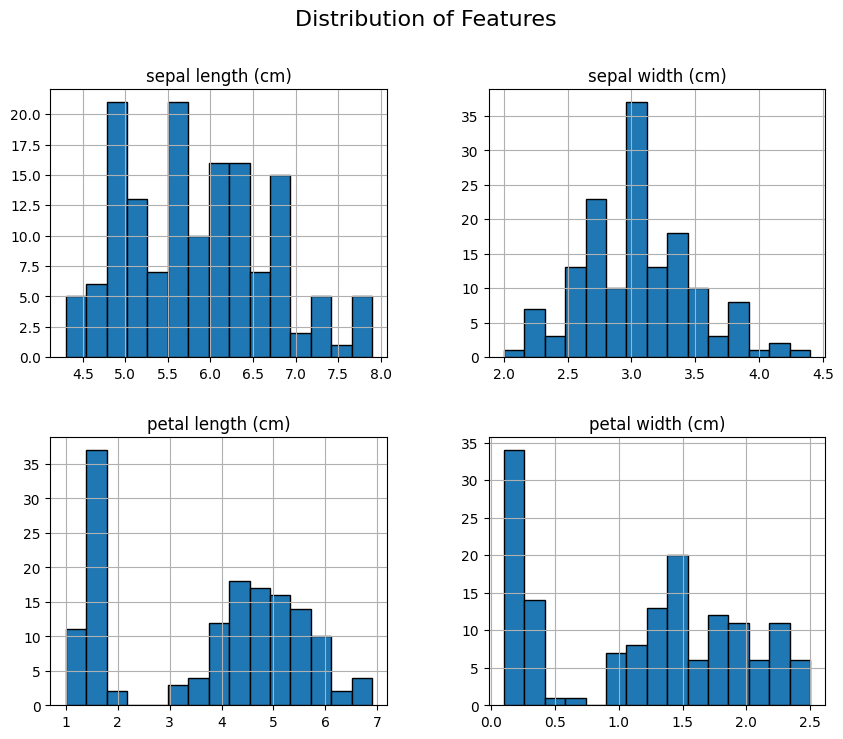

Decision Tree Accuracy: 0.9777777777777777


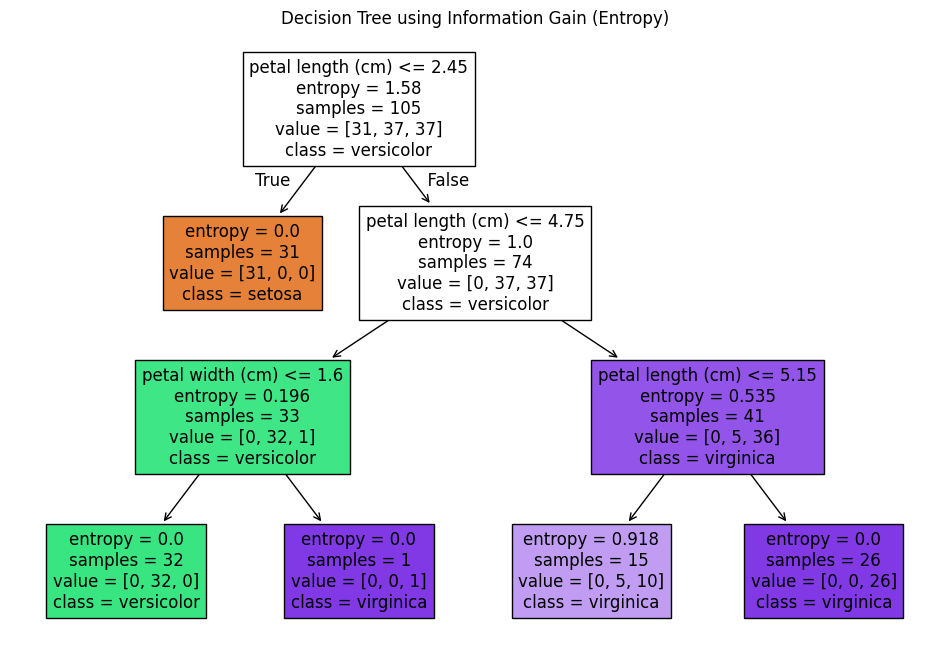

In [2]:

# Step 1: Import libraries
import numpy as np               # numpy: numerical operations, arrays (alias np for short)
import pandas as pd              # pandas: data manipulation and DataFrame (alias pd)
import seaborn as sns            # seaborn: high-level plotting library built on matplotlib (alias sns)
import matplotlib.pyplot as plt  # matplotlib.pyplot: low-level plotting API (alias plt)

from sklearn.datasets import load_iris                             # loader for the classic Iris dataset
from sklearn.tree import DecisionTreeClassifier, plot_tree         # Decision tree model and helper to plot the tree
from sklearn.model_selection import train_test_split              # utility to split data into train and test sets

# Step 2: Load the Iris dataset
iris = load_iris()                                                 # load_iris() returns a Bunch (dict-like) with data, target, feature names, target names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)      # create a DataFrame from iris.data with human-readable column names
df['target'] = iris.target                                         # add the integer target column (0,1,2) to the DataFrame
df['species'] = df['target'].apply(lambda x: iris.target_names[x]) # map integer target to species name (e.g., 0 -> 'setosa') and store as 'species'

# Show first few rows
print(df.head())                                                    # print the first 5 rows of df so you can inspect features and the newly added columns

# Step 3: Plot Sepal Length vs Sepal Width
plt.figure(figsize=(6, 4))                                           # create a new figure with size 6x4 inches for readable plotting
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="species", palette="Set1")
                                                                     # seaborn scatter: plot sepal length vs sepal width, color points by species (hue),
                                                                     # and use the color palette "Set1" for distinct colors
plt.title("Sepal Length vs Sepal Width")                             # give the plot a title
plt.show()                                                           # render the plot to the output cell

# Step 4: Plot Petal Length vs Petal Width
plt.figure(figsize=(6, 4))                                           # new figure for the petal scatter for clarity
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="species", palette="Set2")
                                                                     # scatter plot for petal length vs petal width, colored by species with palette "Set2"
plt.title("Petal Length vs Petal Width")                             # title for the petal scatter plot
plt.show()                                                           # render this plot

# Step 5: Plot distribution of all features
df_features = df.drop(columns=["target", "species"])                 # create a DataFrame containing only numeric feature columns (drop labels)
df_features.hist(figsize=(10, 8), bins=15, edgecolor="black")        # pandas histogram: one subplot per feature, set size, bins, and edge color for bars
plt.suptitle("Distribution of Features", fontsize=16)               # add a centered super-title for the histogram grid
plt.show()                                                           # show the histogram plots

# Step 6: Train Decision Tree
X = df_features                                                     # features matrix X (sepal/petal columns)
y = df['target']                                                    # target vector y (0,1,2 numeric class labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                                                                     # split data into training and test sets;
                                                                     # test_size=0.3 → 30% data for testing, 70% for training;
                                                                     # random_state=42 ensures reproducible split
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
                                                                     # create the decision tree classifier:
                                                                     # criterion="entropy" uses entropy (information gain) as split metric,
                                                                     # max_depth=3 limits the depth to reduce overfitting,
                                                                     # random_state=42 ensures reproducible tree construction where randomness exists
clf.fit(X_train, y_train)                                           # fit the decision tree on training data (learn splits and structure)

print("Decision Tree Accuracy:", clf.score(X_test, y_test))         # evaluate accuracy on the test set using .score() and print result

# Step 7: Visualize Decision Tree (Information Gain Diagram)
plt.figure(figsize=(12, 8))                                         # new larger figure to display the tree clearly
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
                                                                     # plot_tree draws the learned decision tree:
                                                                     # - feature_names: show readable feature labels at split nodes,
                                                                     # - class_names: show species names in leaf info,
                                                                     # - filled=True colors nodes by predicted class (and visualizes purity)
                                                                     # The node text includes information like impurity (entropy), sample counts, and class value distribution
plt.title("Decision Tree using Information Gain (Entropy)")         # add title indicating entropy (information gain) was used
plt.show()                                                           # render the tree diagram
